* La PCB es una grilla de N*M
* A en esquina up,left
* B en esquina down,right
* solo movs. horizontales y verticales en la grilla
* los movimientos solo pueden acercarse a B, no alejarse ni volver

Programe clase capaz de calcular la CANTIDAD POSIBLE  de caminos entre A y B, en 2 formas distintas

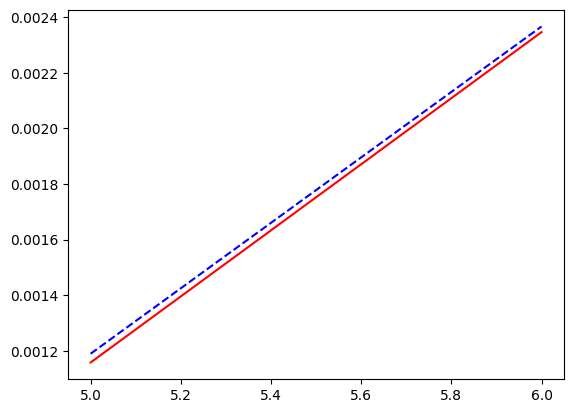

In [7]:
#clase_PCB
import numpy as np
import matplotlib.pyplot as plt
import math
from time import perf_counter

#decoradooooor
def tiempo_tiemposo(func):
    inicio = perf_counter()
    def intervalo(*args, **kwargs):
        funci = func(*args, **kwargs)
        time = perf_counter() - inicio
        return funci, time
    return intervalo 


class PCB:
    def __init__(self, n:int, m:int) -> None:
        self.n = n
        self.m = m
        self.time = 0
        
    def pos(self, k:int, l:int):
        if k==1 or l==1:
            return 1
        else:
            return self.pos(k-1, l) + self.pos(k, l-1)
    
    def caminos1(self):
        return self.pos(self.n, self.m)
    
    def caminos2(self) -> int:
        return math.factorial(self.n + self.m -2) \
            //(math.factorial(self.n -1) * math.factorial(self.m -1))

    @tiempo_tiemposo
    def el_camino(self, func):
        return func
        
    #misma metodo tiempo que hice para mi otra clase
    def tiempo(self) -> None:
        inicio = perf_counter()
        camino = self.caminos()
        self.time = perf_counter() - inicio
        print(self.time)

'''
pcb = PCB(7,6)
print(pcb.el_camino(pcb.caminos1()))
print(pcb.el_camino(pcb.caminos2()))
'''

M = [i for i in range(5,7)]
metodo1 = np.zeros(2)
metodo2 = np.zeros(2)
for m in M:
    pcb = PCB(10,m)
    metodo1[m-5] = pcb.el_camino(pcb.caminos1())[1]
    metodo2[m-5] = pcb.el_camino(pcb.caminos2())[1]
plt.plot(M,metodo1,'r')
plt.plot(M,metodo2,'b--')
plt.show()







In [ ]:
#definir 3er metodo "CALCULAR" q¿en el que usamos el decorador y retorne algo del estilo SOL1 o SOL2 \
# (decir al usuario cual es la solucion que vamos a utilizar para solucionar el problema)


#decorar metodo CALC en vez de cada metodo
@tiempo 